<a href="https://colab.research.google.com/github/lupiel/kaggle-titanic-ml/blob/main/ml-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [145]:
from pathlib import Path
import pandas as pd
import numpy as np

# To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(888)

data_root = "https://github.com/lupiel/kaggle-titanic-ml/raw/main/"

train_data = pd.read_csv(data_root + "data/train.csv")
test_data = pd.read_csv(data_root + "data/test.csv")
dummy_prediction = pd.read_csv(data_root + "data/gender_submission.csv")

train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")
dummy_prediction = dummy_prediction.set_index("PassengerId")


## Explore the data

In [146]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [148]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


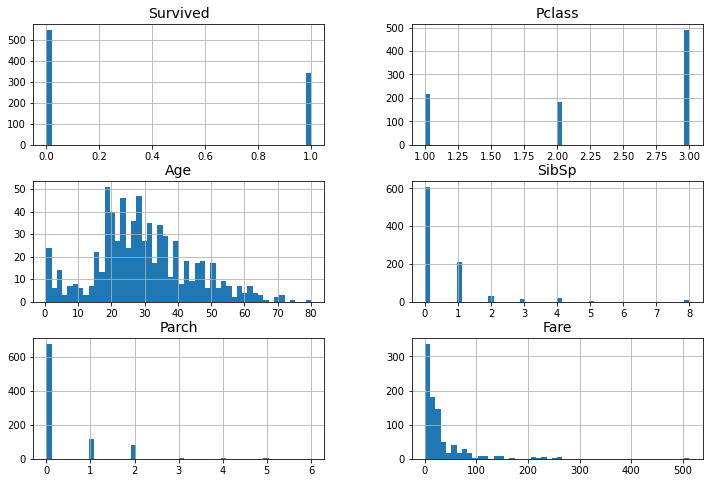

In [149]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [150]:
# target
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [151]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [152]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [153]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

# Can spot a direct correlation of Survived with Pclass and Fare

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

## ML

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

In [156]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# pipeline for categorical attributes
cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [157]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

# preprocessing pipeline
preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [158]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train[:2].round(2)

array([[-0.57,  0.43, -0.47, -0.5 ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [ 0.66,  0.43, -0.47,  0.79,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ]])

In [159]:
y_train = train_data["Survived"]

In [160]:
from sklearn.ensemble import RandomForestClassifier

# training the model
rforest_clf = RandomForestClassifier(random_state=888)
rforest_clf.fit(X_train, y_train)

# making predictions
X_test = preprocess_pipeline.transform(test_data)
y_pred = rforest_clf.predict(X_test)

In [161]:
from sklearn.model_selection import cross_val_score

# checking how good our model is
forest_scores = cross_val_score(rforest_clf, X_train, y_train, cv=10)
forest_scores

array([0.74444444, 0.79775281, 0.75280899, 0.83146067, 0.88764045,
       0.83146067, 0.80898876, 0.76404494, 0.83146067, 0.84269663])

In [162]:
y_pred[:15]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [163]:
answers_df = pd.DataFrame(data={"Survived": y_pred}, index=test_data.index)
answers_df.to_csv("answers_rforest_clf.csv")

In [164]:
answers_df.head(2)

,Survived
PassengerId,
892,0
893,0


## Evaluating the model

In [165]:
# confusion matrix
answear_true = pd.read_csv(data_root + "data/answer_true.csv")
y_true = answear_true["Survived"]

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm

array([[215,  45],
       [ 55, 103]])

Each row represents an actual class.  
Each column represents a predicted class.  


TN = 215 were correctly identified as perished **0** (in reality 0)  
FP = 45 were wrongly classified as survivors **1** (in reality 0) *type I errors*  
FN = 55 were wrongly classified as perished **0** (in reality 1) *type II errors*  
TP = 103 were correctly identified as survivors **1** (in reality 1)



**Precision** - Can be missleading if prediction has only one correct True and the rest is classified as False.  (1/1=100%)

$$precision = {TP \over TP+FP}$$

**Recall** - Can be missleading if prediction has only one correct True and the rest is classified as False.  (1/1=100%)

$$recall = {TP \over TP+FN}$$

<!-- $$ x = {-b \pm \sqrt{b^2-4ac} \over 2a} $$ -->

**$F_1$ score** - Is combining the two above and is sensitive to any of them being low. It favors classifiers that have similar precision and recall (which isn't always desired). 

$$F_1 = {2 \over {{1 \over precision} + {1 \over recall}}}$$


Increasing precision reduces recall, and vice versa, which is called *the precision/recall trade-off*. 

**Accuracy**
$$accuracy = {TP+TN \over TP+TN+FP+FN}$$

In [167]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("precision=", precision_score(y_true=y_true, y_pred=y_pred))
print("recall=   ", recall_score(y_true=y_true, y_pred=y_pred))
print("f1=       ", f1_score(y_true=y_true, y_pred=y_pred))
print("accuracy= ", accuracy_score(y_true=y_true, y_pred=y_pred))

precision= 0.6959459459459459
recall=    0.6518987341772152
f1=        0.673202614379085
accuracy=  0.7607655502392344


**Precision/Recall Trade-off**

To visualise the phenomenon I needed to train a model that allows for running `decision_function` and setting custom threshold.

In [168]:
from sklearn.linear_model import SGDClassifier


# training the model
sgd_clf = SGDClassifier(random_state=888)
sgd_clf.fit(X_train, y_train)

# making predictions
X_test = preprocess_pipeline.transform(test_data)
y_pred_sgd = sgd_clf.predict(X_test)

# scores allows setting own threshold for decision True/False
y_scores_sgd = sgd_clf.decision_function(X_test)
y_scores_sgd[3:6]

array([-1.05571636,  2.63823052,  0.14637697])

In [169]:
threshold = 0
y_pred_sgd_0 = (y_scores_sgd > threshold)
y_pred_sgd_0[3:6]

array([False,  True,  True])

In [170]:
threshold = 1
y_pred_sgd_1 = (y_scores_sgd > threshold)
y_pred_sgd_1[3:6]

array([False,  True, False])

In [171]:
df = pd.DataFrame(data={"true_val": y_true, "score": y_scores_sgd})
df.sort_values(by="score").loc[::5, "true_val"].to_string(index=False).replace("\n", " ")

'0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1'

Above string represents every 5th true value sorted by the y_scores_sgd value. You can notice that 1s are more dense on the right side.  

- Putting the threshold values closer to the right will increase recall and decrease precision.  
- Setting the threshold to the left will increase precision (with possible bumps down on the trend).  
- It is possible to have 100% accuracy by setting threshold in a way to predict only the highest score as (1) and all other as (0). Then accuracy = 1/1.

In [172]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_train_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores_sgd)

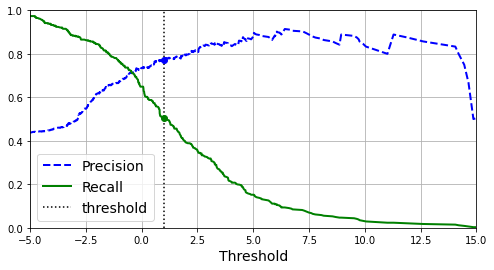

In [173]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-5, 15, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="lower left")
# save_fig("precision_recall_vs_threshold_plot")

plt.show()

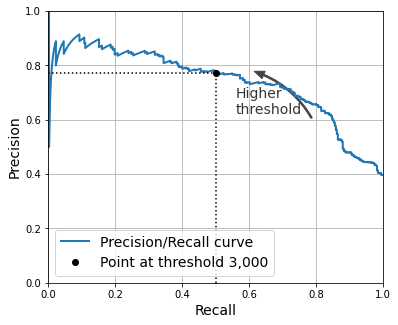

In [174]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

plt.show()

In [176]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision
y_train_pred_90 = (y_train_scores_sgd >= threshold_for_90_precision)
precision_score(y_train, y_train_pred_90)
recall_at_90_precision = recall_score(y_train, y_train_pred_90)

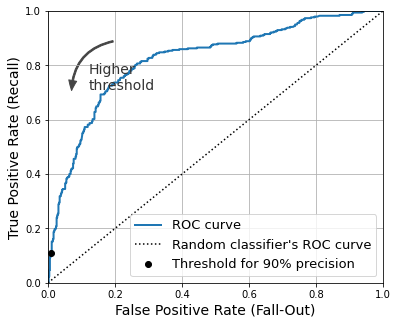

In [178]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_scores_sgd)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
# save_fig("roc_curve_plot")

plt.show()

In [179]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_scores_sgd)

0.8207373320977001